In [ ]:
!wget  https://www.crcv.ucf.edu/data/UCF101/UCF101.rar --no-check-certificate

--2023-03-24 10:34:08--  https://www.crcv.ucf.edu/data/UCF101/UCF101.rar
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 6932971618 (6.5G) [application/rar]
Saving to: ‘UCF101.rar’

UCF101.rar          100%[===================>]   6.46G  74.4MB/s    in 96s     

2023-03-24 10:35:44 (69.1 MB/s) - ‘UCF101.rar’ saved [6932971618/6932971618]



In [ ]:
!unrar x /content/UCF101.rar -d /content

Streaming output truncated to the last 5000 lines.
Extracting  /content/UCF-101/PlayingGuitar/v_PlayingGuitar_g06_c05.avi      62%  OK 
Extracting  /content/UCF-101/PlayingGuitar/v_PlayingGuitar_g06_c06.avi      62%  OK 
Extracting  /content/UCF-101/PlayingGuitar/v_PlayingGuitar_g06_c07.avi      62%  OK 
Extracting  /content/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c01.avi      62%  OK 
Extracting  /content/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c02.avi      62%  OK 
Extracting  /content/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c03.avi      62%  OK 
Extracting  /content/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c04.avi      62%  OK 
Extracting  /content/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c05.avi      62%  OK 
Extracting  /content/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c06.avi      62%  OK 
Extracting  /content/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c07.avi      62%  OK 
Extractin

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import matplotlib.pyplot as plt
import keras.utils as image
import keras
import tensorflow as tf
import imageio

In [ ]:
#creating the dataframes for the list of 5 type of videos

#Train Videos Path Extraction
file = open('/content/trainlist01.txt', "r")
t = file.read()
videos = t.split('\n')   #Spliting the videos by new line.

print(type(videos))
np.shape(videos)

<class 'list'>


(100,)

In [ ]:
#removing the digits from the file path
videos = [ item.split(' ')[0] for item in videos ]
videos

['ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c02.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c03.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c01.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c02.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c03.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c04.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c01.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c02.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c03.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c04.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c05.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g23_c01.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g23_c02.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g23_c03.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g24_c01.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g24_c02.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g24_c03.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g24_c07.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g25_c01.avi',
 'ApplyEyeMakeup/v_ApplyEyeMakeup_g25_c0

In [ ]:
train_data = pd.DataFrame()
train_data['file_name'] = videos
train_data = train_data[:-1]
train_data.head()

,file_name
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c02.avi
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c03.avi
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c01.avi
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c02.avi


In [ ]:
video_tag = []
for i in range(train_data.shape[0]):
    video_tag.append(train_data['file_name'][i].split('/')[0])  
train_data['activity'] = video_tag
train_data.head()

,file_name,activity
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi,ApplyEyeMakeup
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c02.avi,ApplyEyeMakeup
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c03.avi,ApplyEyeMakeup
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c01.avi,ApplyEyeMakeup
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c02.avi,ApplyEyeMakeup


In [ ]:
#Test Videos Path Extraction
file = open('/content/testlist01.txt', "r")
t = file.read()
videos = t.split('\n')   #Spliting the videos by new line.
#videos = [ item.split(' ')[0] for item in videos ]
test_data = pd.DataFrame()
test_data['file_name'] = videos
test_data = test_data[:-1]

video_tag = []
for i in range(test_data.shape[0]):
    video_tag.append(test_data['file_name'][i].split('/')[0])  
test_data['activity'] = video_tag
test_data.head()

,file_name,activity
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c01.avi,ApplyEyeMakeup
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c02.avi,ApplyEyeMakeup
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c05.avi,ApplyEyeMakeup
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c06.avi,ApplyEyeMakeup
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g05_c01.avi,ApplyEyeMakeup


In [ ]:
print(f"Total videos for training: {len(train_data)}")
print(f"Total videos for testing: {len(test_data)}")

train_data.sample(10)

Total videos for training: 99
Total videos for testing: 58


,file_name,activity
59,BabyCrawling/v_BabyCrawling_g08_c02.avi,BabyCrawling
10,ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c04.avi,ApplyEyeMakeup
27,ApplyLipstick/v_ApplyLipstick_g10_c02.avi,ApplyLipstick
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c02.avi,ApplyEyeMakeup
62,BabyCrawling/v_BabyCrawling_g10_c01.avi,BabyCrawling
74,BabyCrawling/v_BabyCrawling_g16_c04.avi,BabyCrawling
17,ApplyEyeMakeup/v_ApplyEyeMakeup_g24_c03.avi,ApplyEyeMakeup
60,BabyCrawling/v_BabyCrawling_g09_c01.avi,BabyCrawling
45,Archery/v_Archery_g16_c01.avi,Archery
41,Archery/v_Archery_g11_c01.avi,Archery


Extraction & Preprocessing of frames

In [ ]:
# I am using VGG16 as a Feature Extractor. the input image size of VGG16 is 224 x 224
IMG_SIZE = 224

# Batch size is used for batch processing in Neural Networks. Large Batch size leads fast process but less accurate and time consuming.
# I am using normal Colab and utilizing the large volume of image data. So I have restricted to use the resources. 
# So that I choose 16 as a Batch size
BATCH_SIZE = 16

EPOCHS = 10
MAX_SEQ_LENGTH = 20

# Number of Features means length of vector(feature) obtained from the VGG16 Encoder. (ie) 512
NUM_FEATURES = 512

**Frames Extraction from the Videos**



In [ ]:
label_processor = keras.layers.StringLookup(
    num_oov_indices=0, vocabulary=np.unique(train_data["activity"])
)
print(label_processor.get_vocabulary())

['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam']


In [ ]:
def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

**Encoder**

In [ ]:
def build_feature_extractor():
    vgg16_model = tf.keras.applications.vgg16.VGG16(
        weights="imagenet",
        include_top=False,
        pooling="max",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )

    preprocess_input = tf.keras.applications.vgg16.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = vgg16_model(preprocessed)
    return keras.Model(inputs, outputs, name="Encoder")


encoder = build_feature_extractor()
encoder.summary()

Model: "Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_3   (None, 224, 224, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_3 (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = df["file_name"].values.tolist()
    labels = df["activity"].values
    labels = label_processor(labels[..., None]).numpy()

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool")
    frame_features = np.zeros(
        shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
    )

    # For each video.
    c = 0 
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = encoder.predict(batch[None, j, :] )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked
        
        c+=1
        print(c," Video frames are encoded ")
        
        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels


train_data, train_labels = prepare_all_videos(train_data, "/content/UCF-101")
test_data, test_labels = prepare_all_videos(test_data, "/content/UCF-101")

1/1 [==============================] - 1s 1s/step
1  Video frames are encoded 
1/1 [==============================] - 1s 881ms/step
2  Video frames are encoded 
1/1 [==============================] - 1s 547ms/step
3  Video frames are encoded 
1/1 [==============================] - 1s 557ms/step
4  Video frames are encoded 
1/1 [==============================] - 1s 552ms/step
5  Video frames are encoded 
1/1 [==============================] - 1s 542ms/step
6  Video frames are encoded 
1/1 [==============================] - 1s 559ms/step
7  Video frames are encoded 
1/1 [==============================] - 1s 551ms/step
8  Video frames are encoded 
1/1 [==============================] - 1s 552ms/step
9  Video frames are encoded 
1/1 [==============================] - 1s 551ms/step
10  Video frames are encoded 
1/1 [==============================] - 1s 559ms/step
11  Video frames are encoded 
1/1 [==============================] - 1s 558ms/step
12  Video frames are encoded 
1/1 [===========

In [ ]:
print(f"Frame features in train set: {train_data[0].shape}")
print(f"Frame masks in train set: {train_data[1].shape}")

Frame features in train set: (99, 20, 512)
Frame masks in train set: (99, 20)


In [ ]:
print(f"Frame features in test set: {test_data[0].shape}")
print(f"Frame masks in test set: {test_data[1].shape}")

Frame features in test set: (58, 20, 512)
Frame masks in test set: (58, 20)


**Decoder**

In [ ]:
class_vocab = label_processor.get_vocabulary()

frame_features_input = keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))
mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")

x = keras.layers.LSTM(32, return_sequences=True)(frame_features_input, mask=mask_input)
x = keras.layers.LSTM(16)(x)
x = keras.layers.Dropout(0.6)(x)
x = keras.layers.Dense(8, activation="relu")(x)
output = keras.layers.Dense(len(class_vocab), activation="softmax")(x)

#  DropOut Layer randomly deactivates the neurons on the training time, to avoid/prevent from overfitting
#  Here I decided to fit between LSTM layer and Dense layer. This is a made be various combinations. 
#  This combination gives better results compared to others 
 

# 'ReLU' activation is used for most of the hidden dense layers
# 'Softmax' activation gives the probabilities. So it is used in the last dense layer for classification


decoder = keras.Model([frame_features_input, mask_input], output)
decoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 20, 512)]    0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 20)]         0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 20, 32)       69760       ['input_9[0][0]',                
                                                                  'input_10[0][0]']               
                                                                                                  
 lstm_1 (LSTM)                  (None, 16)           3136        ['lstm[0][0]']               

In [ ]:
decoder.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# this problem is a multi class problem and labels are denoted as [0,1,2,3..] ie. not in the form of one hot encoding.
# So we use loss as sparse categorical cross entropy

# Adam = Adaptive Momentum is one of the proven optimizer for the classification task. Anyhow I used the SGD also. But This one gives better results

# Accuracy is general measure used in classification tasks

In [ ]:
filepath = "/content/model_wt.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, save_weights_only=True, verbose=1)

In [ ]:
history = decoder.fit(
        [train_data[0], train_data[1]],
        train_labels,
        validation_split=0.1,
        epochs=EPOCHS,
        callbacks=[checkpoint],
    )


Epoch 1/10
3/3 [==============================] - ETA: 0s - loss: 0.6735 - accuracy: 0.8090
Epoch 1: saving model to /content/model_wt.h5
3/3 [==============================] - 0s 90ms/step - loss: 0.6735 - accuracy: 0.8090 - val_loss: 1.4759 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - ETA: 0s - loss: 0.5682 - accuracy: 0.8764
Epoch 2: saving model to /content/model_wt.h5
3/3 [==============================] - 0s 62ms/step - loss: 0.5682 - accuracy: 0.8764 - val_loss: 1.4735 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - ETA: 0s - loss: 0.6068 - accuracy: 0.8090
Epoch 3: saving model to /content/model_wt.h5
3/3 [==============================] - 0s 63ms/step - loss: 0.6068 - accuracy: 0.8090 - val_loss: 1.4561 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - ETA: 0s - loss: 0.5173 - accuracy: 0.8876
Epoch 4: saving model to /content/model_wt.h5
3/3 [==============================] - 0s 70ms/step - loss: 0.51

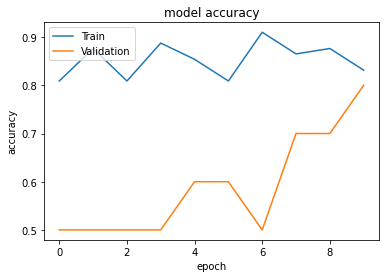

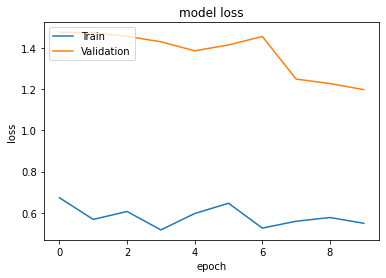

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
decoder.load_weights(filepath)
_, accuracy = decoder.evaluate([test_data[0], test_data[1]], test_labels)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

2/2 [==============================] - 0s 20ms/step - loss: 0.7811 - accuracy: 0.7414
Test accuracy: 74.14%


**Classification Report & Confusion Matrix**

In [ ]:
classes = ['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam']
pred = decoder.predict([test_data[0], test_data[1]])
prediction = []
for each_pred in pred:
  pred_index = np.argmax(each_pred)
  prediction.append([pred_index])

2/2 [==============================] - 0s 13ms/step


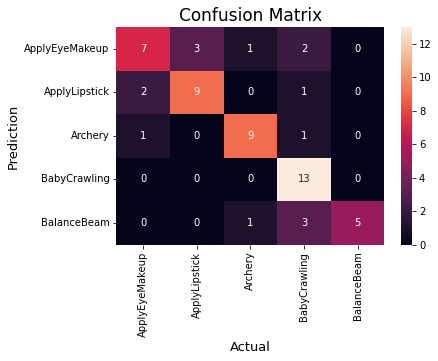

In [ ]:
from sklearn import metrics
import seaborn as sns

confusion_matrix = metrics.confusion_matrix(test_labels, prediction)
sns.heatmap(confusion_matrix,
            annot=True,
            fmt='g',
            xticklabels=classes,
            yticklabels=classes)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
print(metrics.classification_report(test_labels, prediction, target_names=classes))

                precision    recall  f1-score   support

ApplyEyeMakeup       0.67      0.77      0.71        13
 ApplyLipstick       0.64      0.58      0.61        12
       Archery       1.00      0.82      0.90        11
  BabyCrawling       0.62      1.00      0.76        13
   BalanceBeam       1.00      0.22      0.36         9

      accuracy                           0.71        58
     macro avg       0.78      0.68      0.67        58
  weighted avg       0.76      0.71      0.68        58



**Inference**

In [ ]:
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-byvn62co
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-byvn62co
  Resolved https://github.com/tensorflow/docs to commit fc6d14505c5d72a96a09496407cea3e1f2db6550
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=182612 sha256=4789ea48a5cf4968895673ca33c756ae6d12fb36d6f37620c6bbb9c234a99701
  Stored in directory: /tmp/pip-ephem-wheel-cache-6733co6d/wheels/fc/f8/3b/5d21409a59cb1be9b1ade11f682039ced75b84de9dd6a0c8de
Successfully built tensorflow-docs


Test video path: ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c06.avi
1/1 [==============================] - 0s 99ms/step



 ======================= PREDICTED ACTION :  ApplyEyeMakeup   ========== 






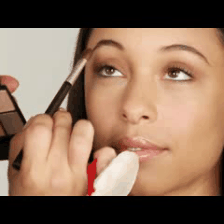

In [ ]:
from tensorflow_docs.vis import embed


def prepare_single_video(frames):
    frames = frames[None, ...]
    frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
    frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")

    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            frame_features[i, j, :] = encoder.predict(batch[None, j, :])
        frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

    return frame_features, frame_mask


def sequence_prediction(path):
    class_vocab = label_processor.get_vocabulary()

    frames = load_video(os.path.join("/content/UCF-101", path))
    frame_features, frame_mask = prepare_single_video(frames)
    probabilities = decoder.predict([frame_features, frame_mask])[0]

    predict_action = np.argsort(probabilities)[::-1]
    print(f"\n\n\n ======================= PREDICTED ACTION : ",class_vocab[0],"  ========== \n\n\n")
    return frames


def to_gif(images):
    converted_images = images.astype(np.uint8)
    imageio.mimsave("animation.gif", converted_images, fps=10)
    return embed.embed_file("animation.gif")


test_video = "ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c06.avi"
print(f"Test video path: {test_video}")
test_frames = sequence_prediction(test_video)
to_gif(test_frames[:MAX_SEQ_LENGTH])